In this notebook, we will do some basic data analyses. As a basis, we will use a synthetic data set containing biographical and medicinal information of 10.000 persons.

We will guide you through a number of common steps in a typical data analysis project. We first briefly describe what we will do (and why) and then show the code. To execute a code block, press `ctrl + enter` and wait for the execution to finish. Typically, after the execution of a code block you will see a text print and/or relevant figure.

# 0. Python and data primer

## 0.1. Python primer

In this section we will provide a concise overview of the Python language, to enable you to get started. The '#' sign is used to start a comment in Python, that lasts until the end of the line. The 'print()' command can be used to print output. The 'type()' command shows the type of its argument. Python indexing always starts at 0. For more information about Python, please refer to https://docs.python.org/3/reference/index.html.

### Primitive types
First, lets go over some primitive types in Python: integers (whole numbers), floats (real numbers), booleans (true/false) and strings (text).

In [ ]:
# integers
a = 1
print(type(a))
print(a)

In [ ]:
# floats
b = 1.0
type(b)
print(b)

In [ ]:
# booleans
c = True
print(type(c))
print(c)
d = a == 2
print(d)

In [ ]:
# string
s = 'We are the knights who say "Ni!"'
print(type(s))
print(s)
s2 = s + ' And we demand a shrubbery!'
print(s2)

### Built-in basic data types

Python has a number of built-in data types, including lists, dictionaries and sets. We will briefly go over the uses and syntax of each of these.

A *list* is an ordered sequence of values, not necessarily of the same type. Lists can be initialized via square brackets [].

In [ ]:
l = [1, 'blah', 2.0, True]
print(type(l))
print(l)

# iterate over list
for i in l:
    print(i)
    
# add element to a list
l.append(5)
print(l)

# list slicing: print the first 3 elements
print(l[0:3])

# length of the list: use the len() function
print(len(l))

A *dictionary* (dict) is a container that maps (unique) keys to values, and is typically initialized using curly brackets {}.

In [ ]:
d = {'a': 1, 'b': 2}
print(type(d))
print(d)

# get item 'a' from the dictionary
print(d['a'])

# length of the dictionary
print(len(d))

# iterate over the dictionary
# note that the ordering is not necessarily as initialized
for k, v in d.items():
    print('key %s mapped to value %d' % (k, v))

A *set* is a container for distinct values, and can be initialized via the *set()* function.

In [ ]:
s1 = set([1, 2, 3, 3])
print(type(s1))
print(s1)

s2 = set([3, 4, 5])
print(s2)

# set union
s3 = s1.union(s2)
print(s3)

# set difference
s4 = s1.difference(s2)
print(s4)

### Various useful functions

The 'help()' function can be used to open the documentation of a certain function or data type.

In [ ]:
# 1.0 represents a float object
help(1.0)

In [ ]:
# map() is a built-in function
help(map)

List comprehensions provide an elegant way to create or transform iterables.

In [ ]:
# to see what range() does, use help(range)
a = [5 * i for i in range(5)]
print(a)
b = [x - 1 for x in a]
print(b)

The next step is importing libraries and/or data. Python has a wealth of libraries that provide well-documented functions we can use for data analysis. In particular, we will use 'NumPy' (numerical support, esp. linear algebra), 'scikit-learn' (machine learning), 'pandas' (statistics) and matplotlib (plotting). A library can be loaded using the 'import' command and renamed via 'import x as y'. To call function x from library y, we use y.x().

In [1]:
import numpy as np # numpy
import sklearn # scikit-learn
import pandas as pd # pandas

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.style.use('ggplot')

## 0.2 The data set

We will use a synthetic data set based on health expenditure data. The data is organized as a matrix, and contains biographical information, class labels and information about drug purchases.

For your convenience, we created a small library for loading the data and some convenience functions. We will load the library as 'ibd4h'.

In [2]:
import ibd4health as ibd4h
data = ibd4h.data
features = ibd4h.features
labels = ibd4h.labels
colidx = ibd4h.colidx

The following variables are important:
- **data**: the data matrix, rows correspond to patients, columns to features
- **features**: the list of features (corresponding to columns in ibd4h.data)
- **labels**: the labels for patients (corresponding to rows, True: diabetic, False: non-diabetic)
- **colidx**: a dictionary to facilitate retrieving columns from their string definitions

In [3]:
print("Data set contains info on %d patients with %d features." 
      % data.shape)
print("Feature list has %d entries." 
      % features.shape)
print("Label list has %d entries, of which %d are positive." 
      % (labels.shape[0], sum(labels)))

Data set contains info on 10000 patients with 1097 features.
Feature list has 1097 entries.
Label list has 10000 entries, of which 5000 are positive.


The features in this data set include age, gender the volume of drugs purchased by the patient. Lets have a look at the first 3 features.

In [4]:
for idx, feat in enumerate(features[:3]):
    print('feature %d: %s' % (idx, feat))

feature 0: b'age'
feature 1: b'gender'
feature 2: b'A01AA01'


Drug volumes are categorized via codes of the anatomical therapeutic chemical (ATC) classification system (cfr. http://www.whocc.no/atc_ddd_index/ for details). You can find a description of ATC code XXX in the data set at http://www.whocc.no/atc_ddd_index/?showdescription=yes&code=XXX. For example, information on the third feature 'A01AA01', can be found at http://www.whocc.no/atc_ddd_index/?showdescription=yes&code=A01AA01.

The data matrix can be indexed via `data[rowidx, colidx]`. For example, the age of the first patient:

In [5]:
ageidx = colidx['age']
age = data[0, ageidx]
print(age)

73.4415943908


For slicing, replace either rowidx or colidx with ":". For example, to get a vector of all ages, we can use:

In [6]:
ages = data[:, ageidx]
print(ages.shape)
print('Average age: %1.3f' % np.mean(ages))
print('Minimum age: %1.3f' % np.min(ages))
print('Maximum age: %1.3f' % np.max(ages))

(10000,)
Average age: 67.517
Minimum age: 49.323
Maximum age: 94.330


# 1. Exploratory analysis

Exploratory analysis is an important step in any project. This step serves several purposes, including:
- understand the basic properties and underlying structure of the data set
- perform sanity checks wherever possible to ensure that the data is pristine

We will first check some basic properties: the gender distribution of our data set, and within the positive and negative subgroups.

In [7]:
genderidx = colidx['gender']
# create a list of gender indicators via list comprehension
genders = [x > 0 for x in data[:, genderidx]]

# define gender representation
male = False
female = True

num_males = genders.count(male)
num_females = genders.count(female)
print('Data set contains %d males and %d females.' % (num_males, num_females))

# gender distribution in diabetics
positive_rowidx = [idx for idx, label in enumerate(labels) if label]
positive_genders = [x > 0 for x in data[positive_rowidx, genderidx]]

num_positive_males = positive_genders.count(male)
num_positive_females = positive_genders.count(female)
print('Data set contains %d positive males and %d positive females.' % (num_positive_males, num_positive_females))

Data set contains 5000 males and 5000 females.
Data set contains 2500 positive males and 2500 positive females.


Our first test shows that the data set is fully gender balanced and class balanced. Next, lets look at the age distribution of patients in the data set. We will do this by plotting a histogram using matplotlib's [`hist()` function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist).

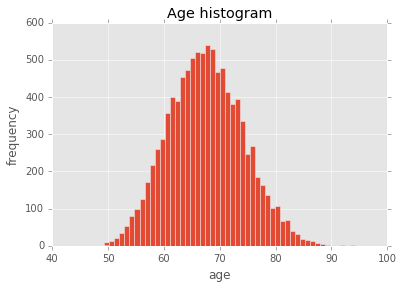

In [8]:
plt.hist(data[:, ageidx], bins=50)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Age histogram')

Next, lets see if the age distributions are comparable for males and females.

[False False False False False]
[ True  True  True  True  True]


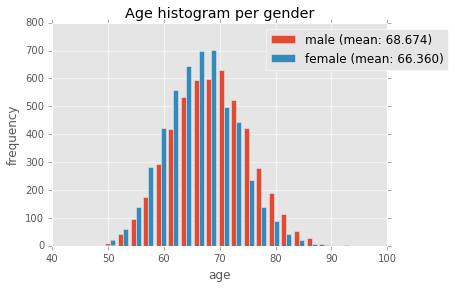

In [9]:
# create a mask to identify males and females in the data
male = data[:, colidx['gender']] > 0
female = np.invert(male)
print(female[:5])
print(male[:5])

# create vectors of ages
male_ages = data[male, ageidx]
female_ages = data[female, ageidx]

# plot histograms of age vectors
plt.hist((male_ages, female_ages), bins=20)
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend(['male (mean: %1.3f)' % np.mean(male_ages),
           'female (mean: %1.3f)' % np.mean(female_ages)],
          bbox_to_anchor=(1.2,1.0))
plt.title('Age histogram per gender')

After stratifying the age histogram by gender, we can see that males tend to be a bit older in our data set, but the differences are not extremely large.

A next step to get some intuition in the data is to assess basic pair-wise relationships between features. The function below plots the distributions of two data columns of your choice and shows a simple [least-squares](https://en.wikipedia.org/wiki/Least_squares) regression line. Finally, we also compute the [Pearon correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between the feature pair to assess if they are related. The Pearson correlation ranges from -1 (anticorrelated) to 1 (perfectly correlated), with 0 implying there is no linear correlation.

In [10]:
# function to plot two features to explore relationships between them
def plot_feature_pair(feature_a, feature_b):
    column_a = data[:, colidx[feature_a]]
    column_b = data[:, colidx[feature_b]]
    n = data.shape[0]
    plt.plot(column_a, column_b, '+', mew=2)
    plt.xlabel(feature_a)
    plt.ylabel(feature_b)
       
    # to remove outliers, we will show only up to the 95% percentile
    max_a = list(sorted(column_a))[int(0.95 * n)]
    max_b = list(sorted(column_b))[int(0.95 * n)]
   
    # compute regression line
    A = np.vstack([column_a[:], np.ones(len(column_a))]).T
    m, c = np.linalg.lstsq(A, column_b[:])[0]
    plt.plot(column_a, m*column_a + c, 'k', linewidth=3, label='LS regression')
    plt.xlim(0, max_a)
    plt.ylim(0, max_b)
    
    plt.legend(bbox_to_anchor=(1.2,1.0))
    
    # compute correlation between features
    corr = np.corrcoef(np.array((column_a, column_b)))
    print('Pearson correlation: %1.3f' % corr[0, 1])

First, lets look at the relationship between a person's age and his or her statin usage. Statins are a class of lipid-lowering medication, so we expect it to be positively correlated with age.

Pearson correlation: 0.158


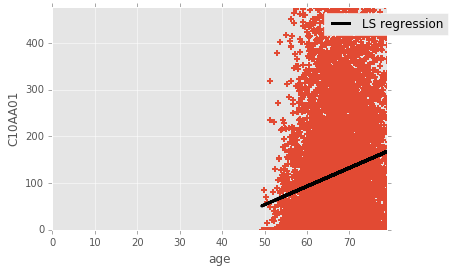

In [11]:
# age and statins (simvastatin) --> strong correlation
plot_feature_pair('age', 'C10AA01')

As expected, we see a clear correlation between age and statin usage.

Next, we will check two unrelated types of medication: paracetamol and statins.

Pearson correlation: 0.005


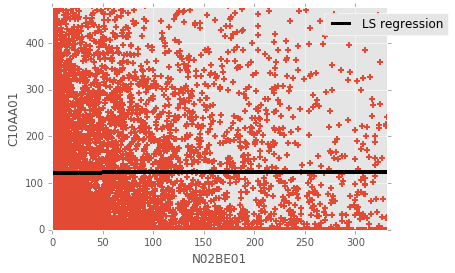

In [12]:
# paracetamol and statins (simvastatin) --> weak correlation
plot_feature_pair('N02BE01', 'C10AA01')

The Pearson correlation coefficient between paracetamol and statin usage is almost 0, which indicates that no (linear) relationship exists between these two features. This confirms our expectations.

# 2. Simple predictive modelling

Next, we want to construct a classifier to predict whether a person will need glucose-lowering agents in the future (the labels), based on his or her recent medical history (the feature vectors). First, we must split the data into two partitions: one for training the classifier, and one for testing it.

We will do this by generating a random permutation of the data, and then use the first half to train a model and the second half to test it.

In [13]:
# create a permutation of the original data and labels
num_patients = len(data)
permutation_index = np.random.permutation(num_patients)
permuted_data = data[permutation_index, :]
permuted_labels = labels[permutation_index]

# create training data and labels
subset_size = int(num_patients / 2)
train_data = permuted_data[:subset_size, :]
train_labels = permuted_labels[:subset_size]

# create test data and labels
test_data = permuted_data[subset_size:, :]
test_labels = permuted_labels[subset_size:]

Now it is time to build a predictive model. For simplicity, we will use a linear support vector machine (SVM) as described in this morning's lecture. The optimization problem of a linear SVM can be written as follows:

$\begin{align}\min_{\mathbf{w},\xi,b} &= \frac{1}{2}\|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i, \\
\text{subject to: } &y_i (\mathbf{w}^T\mathbf{x}_i - b) \geq 1, \quad \forall i=1,\ldots,N, \end{align}$

Where $y$ is the vector of class labels, $\mathbf{x}_i$ is the i'th data vector, $\mathbf{w}$ is the separating hyperplane and $\xi$ is a vector of slack variables to allow misclassifications in the training set ($\xi_i > 0$ if and only if instance i is misclassified and 0 otherwise). The hyperparameter $C$ controls the tradeoff between the simplicity of the model (minimizing $\|\mathbf{w}\|^2$) and classification accuracy on the training set (minimizing $\sum_{i=1}^N \xi_i$).

A linear SVM computes a hyperplane that optimally separates the two classes by maximizing the margin, that is the between the separating hyperplane $\mathbf{w}$ and instances of either class, while some instances may be inside the margin (uncertain classifications) or on the wrong side of the separating hyperplane (misclassifications). Increasing the hyperparameter puts more emphasis on minimizing the amount of misclassified instances and instances within the margin.

We will use the implementation of linear SVM classifiers that is available in [sklearn.svm.LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

In [14]:
# import the LinearSVC function
from sklearn.svm import LinearSVC

# create a linear SVM with default parameters (C=1.0)
svm = LinearSVC()

# train the model using the training data
svm.fit(X=train_data, y=train_labels) 

# predict the test data using our model
# we use decision_function() to compute the (signed) distance to the separating hyperplane for each test instance
test_predictions = svm.decision_function(test_data)

First, lets have a qualitative look at our SVM's predictions, by plotting a histogram of the predictions of the positive and negative class. Hopefully, the predicted decision values for the positive test instances or structurally larger than the those for the negative test instances.

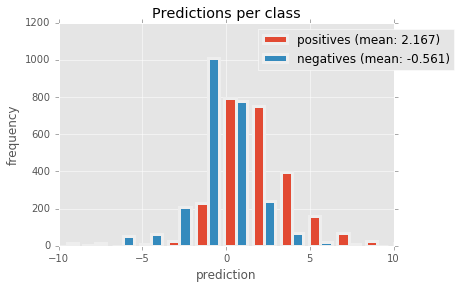

In [15]:
# get indices of the positive and negative instances in the test set
positive_test_indices = [i for i, x in enumerate(test_labels) if x]
negative_test_indices = [i for i, x in enumerate(test_labels) if not x]

# partition the predictions per class
positive_predictions = test_predictions[positive_test_indices]
negative_predictions = test_predictions[negative_test_indices]

# plot histograms of age vectors
ax = plt.subplot(111)
ax.hist((positive_predictions, negative_predictions), bins=50, linewidth=3)
plt.xlabel('prediction')
plt.ylabel('frequency')
plt.legend(['positives (mean: %1.3f)' % np.mean(positive_predictions),
            'negatives (mean: %1.3f)' % np.mean(negative_predictions)            
            ], bbox_to_anchor=(1.2,1.0))
plt.xlim([-10, 10])
plt.title('Predictions per class')

In [16]:
# for reference, we will also see what happens in the training set
train_predictions = svm.decision_function(train_data)

# get indices of the positive and negative instances in the train set
positive_train_indices = [i for i, x in enumerate(train_labels) if x]
negative_train_indices = [i for i, x in enumerate(train_labels) if not x]

# partition the predictions per class
positive_train_predictions = train_predictions[positive_train_indices]
negative_train_predictions = train_predictions[negative_train_indices]

So far so good: the histograms indicate that the predictions for positives tend to be higher than those for negatives. Now lets quantify the predictive performance.

The empirical evaluation of classifiers requires a **score function**, that is an objective, quantitative criterion to assess the performance. In machine learning, many types of score functions exist, and these are often designed to meet a certain application's unique requirements (e.g., its tradeoff between the cost of false positives vs. false negatives). It is important to use an independent test set to evaluate generalization performance of a model (that is, its predictive performance on unseen data) in order to avoid [overfitting](https://en.wikipedia.org/wiki/Overfitting).

Most score functions for binary classification are based on entries of the so-called **contingency table**, which relates a model's predictions to the ground truth (given labels) via counts of *true positives* ($TP$: correct positive predictions), *false positives* ($FP$: incorrect positive predictions), *true negatives* ($TN$: correct negative predictions) and *false negatives* ($FN$: incorrect negative predictions).

The simplest way to evaluate a classifier's predictive performance is by computing its accuracy on an independent test set. Accuracy is simply the fraction of the model's (binary) predictions (positive/negative) that were correct. However, most models provide more information than a simple binary prediction: typically a level of confidence in the prediction is also available. For example, a logistic regression classifier outputs the probability that a certain instance belongs to the positive class (ranging between 0 and 1). An SVM provides the signed distance to the separating hyperplane (ranging between $-\infty$ and $+\infty$), where higher absolute values imply higher confidence in the prediction. 

Naive score metrics that only account for a single *operating point* (like accuracy, sensitivity, specificity, ...) require choosing a certain **threshold** to turn the classifier's continuous predictions (e.g., probabilities) into binary decisions. For example, the default threshold for probabilistic models is 0.5 (50% probability that the instance is positive) while the default threshold for SVM models is 0 (instance is exactly on the separating hyperplane). Clearly, score metrics based on a single threshold fail to penalize/reward a lot of the (learned) information embedded in a model, and are hence suboptimal to compare models for many applications.

In this session we will use **[receiver operating characteristic (ROC) curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)**, which visualize a model's true positive rate ($TPR = TP / (TP+FN)$, ranging from 0 to 1) as a function of its false positive rate ($FPR = FP / (FP + TN)$, ranging from 0 to 1) over its full operating range (that is, all possible thresholds). An ROC curve is a monotonically increasing curve. A perfect classifier's ROC curve contains the point (0, 1), which means that it identifies all positives ($TPR = 1$) without any false positives ($FPR = 0$). A commonly used summary statistic is the area under the curve (AUC), which realistically ranges between 0.5 (random model) and 1.0 (perfect model).

An implementation of ROC analysis is available in [sklearn.metrics](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

The linear SVM has roughly 82% area under the ROC curve.


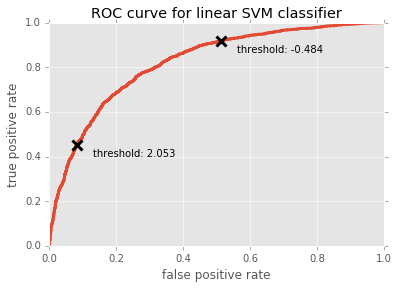

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# the roc_curve function returns lists of false positive rates, true positive rates 
# and the corresponding thresholds as discussed previously
fpr, tpr, thresholds = roc_curve(test_labels, test_predictions, pos_label=True)
AUC = roc_auc_score(test_labels, test_predictions)

# we will mark two thresholds on the plot
index_a = int(0.2 * len(thresholds))
index_b = int(0.8 * len(thresholds))

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=3)
plt.plot([fpr[index_a], fpr[index_b]], [tpr[index_a], tpr[index_b]], 'kx', markersize=10, mew=3)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve for linear SVM classifier')
plt.axes().axis([0, 1, 0, 1])
d = 0.05
plt.annotate('threshold: %1.3f' % thresholds[index_a], xy=(fpr[index_a]+d, tpr[index_a]-d))
plt.annotate('threshold: %1.3f' % thresholds[index_b], xy=(fpr[index_b]+d, tpr[index_b]-d))
print('The linear SVM has roughly %d%% area under the ROC curve.' % int(100 * AUC))

# convenience function to summarize contingency table
def print_performance(labels, predictions, threshold):
    total = len(labels)
    print('\nPredictive performance with threshold %1.3f' % threshold)
    binary_predictions = predictions > threshold
    tp = sum(binary_predictions & labels)
    fp = sum(binary_predictions & np.invert(labels))
    tn = sum(np.invert(binary_predictions) & np.invert(labels))
    fn = sum(np.invert(binary_predictions) & labels)
    print('- %d true positives \t (%d%% of total test set)' % (tp, int(100.0 * tp / total)))
    print('- %d false positives \t (%d%% of total test set)' % (fp, int(100.0 * fp / total)))
    print('- %d true negatives \t (%d%% of total test set)' % (tn, int(100.0 * tn / total)))
    print('- %d false negatives \t (%d%% of total test set)' % (fn, int(100.0 * fn / total)))
    print('- accuracy: %d%%' % int(100.0 * (tp + tn) / total))
    print('- sensitivity: %d%%' % int(100.0 * (tp) / (tp + fn)))
    print('- specificity: %d%%' % int(100.0 * (tn) / (fp + tn)))

First, lets have a look at the predictive performance at the first threshold.

In [18]:
print('Test set results')
print_performance(test_labels, test_predictions, thresholds[index_a])

print('\n\nTraining set results')
print_performance(train_labels, train_predictions, thresholds[index_a])

Test set results

Predictive performance with threshold 2.053
- 1130 true positives 	 (22% of total test set)
- 205 false positives 	 (4% of total test set)
- 2297 true negatives 	 (45% of total test set)
- 1368 false negatives 	 (27% of total test set)
- accuracy: 68%
- sensitivity: 45%
- specificity: 91%


Training set results

Predictive performance with threshold 2.053
- 1169 true positives 	 (23% of total test set)
- 151 false positives 	 (3% of total test set)
- 2347 true negatives 	 (46% of total test set)
- 1333 false negatives 	 (26% of total test set)
- accuracy: 70%
- sensitivity: 46%
- specificity: 93%


Now lets try the other threshold.

In [19]:
print('Test set results')
print_performance(test_labels, test_predictions, thresholds[index_b])

print('\n\nTraining set results')
print_performance(train_labels, train_predictions, thresholds[index_b])

Test set results

Predictive performance with threshold -0.484
- 2293 true positives 	 (45% of total test set)
- 1281 false positives 	 (25% of total test set)
- 1221 true negatives 	 (24% of total test set)
- 205 false negatives 	 (4% of total test set)
- accuracy: 70%
- sensitivity: 91%
- specificity: 48%


Training set results

Predictive performance with threshold -0.484
- 2394 true positives 	 (47% of total test set)
- 1168 false positives 	 (23% of total test set)
- 1330 true negatives 	 (26% of total test set)
- 108 false negatives 	 (2% of total test set)
- accuracy: 74%
- sensitivity: 95%
- specificity: 53%


The results show that sensitivity increases when the threshold for positive predictions decreases (i.e., more patients are labeled positive in the binary predictions), while specificity decreases. A high threshold corresponds to conservative predictions, where only the patients with highest confidence are predicted positive.

For the linear SVM we see that the predictive performance on the training and test set is comparable. Because the linear model has low complexity, it doesn't overfit the training set. In the next code section, we will use an RBF kernel (nonlinear kernel) with very low bandwidth, which yields a very complex model (that is a model that can fit highly complex patterns).

In [20]:
# import the SVC function
from sklearn.svm import SVC

# create a SVM with RBF kernel with high penalty on misclassification and low bandwidth (C=10.0, gamma=1000)
svm_rbf = SVC(C=10, gamma=1000)

# train the model using the training data
svm_rbf.fit(X=train_data, y=train_labels) 

# predict the test data using our model
# we use decision_function() to compute the (signed) distance to the separating hyperplane for each test instance
test_predictions_rbf = svm_rbf.decision_function(test_data)
train_predictions_rbf = svm_rbf.decision_function(train_data)

print('Training set results')
print_performance(train_labels, train_predictions_rbf, 0.0)

print('\n\nTest set results')
print_performance(test_labels, test_predictions_rbf, 0.0)

Training set results

Predictive performance with threshold 0.000
- 2502 true positives 	 (50% of total test set)
- 0 false positives 	 (0% of total test set)
- 2498 true negatives 	 (49% of total test set)
- 0 false negatives 	 (0% of total test set)
- accuracy: 100%
- sensitivity: 100%
- specificity: 100%


Test set results

Predictive performance with threshold 0.000
- 2498 true positives 	 (49% of total test set)
- 2502 false positives 	 (50% of total test set)
- 0 true negatives 	 (0% of total test set)
- 0 false negatives 	 (0% of total test set)
- accuracy: 49%
- sensitivity: 100%
- specificity: 0%


You can see that this fits the training data very well, but performs poorly on the test data. This illustrates that model complexity is an important tradeoff, and model selection should always be based on generalization performance on an independent test set is used.

# 3. Evaluating performance

While building a predictive model we need to evaluate its performance before deploying it. The simplest way is to simply split the training data in to two parts: one for training and one for validation. ![Train test split](pics/fig_split-1.png)
While this method is simple it may lead to unstable results for different splits. In order to reduce variance we can repeat multiple times the same procedure which we call $k$-fold cross-validation.
![5 fold Cross validation](pics/fig_cv-2.png)

In [21]:
from sklearn import cross_validation 
from sklearn.ensemble import RandomForestClassifier


# Let's build a cross validator.
# We use a fixed seed in order to compare classifiers across the same folds.
# X is the training set, y the training labels and clf the model to evaluate
def crossValidateClassifier(X,y,clf):
    # first we set a 5-fold cv object
    cross_val = cross_validation.KFold(len(y),n_folds=10,shuffle=True,random_state=123)
    # For scoring we have to define a performance measure to evaluate
    cv_score = cross_validation.cross_val_score(clf,X,y,scoring='roc_auc',cv=cross_val)
    #collect the scores and calculate mean and std
    return np.mean(cv_score),np.std(cv_score)

# Set here your favorite model
model = RandomForestClassifier(n_estimators=50,max_depth=15,n_jobs=3)
cv_mean,cv_std = crossValidateClassifier(data,labels,model)
print ("5-CV mean: {0:f} std: {1:f}".format(cv_mean,cv_std))

# Try to change the number of folds and observe the results

5-CV mean: 0.914110 std: 0.008220


### Questions

In the above code we shuffle the data. Could you imagine why? In which cases this is not advisable?

# 4. Feature selection

We will work with some feature selection methods in order to remove attributes that may not be necessary for the predictive models. Let's have a look again at the data rapidly. This time we use a pandas DataFrame and then printing the first rows as well as a description for each feature.

In [22]:
# Create the data frame
df = pd.DataFrame(data,columns=features)
# Print the first rows
print (df.head())
# Print a description of the variables
print (df.describe())

#df['gender'].astype(int).unique()

# A simple technique for feature selection is to remove the attributes with low or zero variance.
# For this purpose we will Scikit-learn
from sklearn.feature_selection import VarianceThreshold

# here we can specify a threshold, default is zero variance

var_selector = VarianceThreshold(0.0)
new_data = var_selector.fit_transform(data)

print ("Reduced dataset contains {0:d} features".format(new_data.shape[1]))

      b'age'  b'gender'  b'A01AA01'  b'A01AA30'  b'A01AB03'  b'A01AB09'  \
0  73.441594        1.0         0.0         0.0    4.567449         0.0   
1  65.964129        1.0         0.0         0.0    0.000000         0.0   
2  73.871248        1.0         0.0         0.0    0.000000         0.0   
3  69.656015        1.0         0.0         0.0    0.000000         0.0   
4  67.309671        1.0         0.0         0.0    0.000000         0.0   

   b'A01AB12'  b'A01AC01'  b'A02AD01'  b'A02AD02'     ...      b'V08AA01'  \
0         0.0         0.0         0.0         0.0     ...             0.0   
1         0.0         0.0         0.0         0.0     ...             0.0   
2         0.0         0.0         0.0         0.0     ...             0.0   
3         0.0         0.0         0.0         0.0     ...             0.0   
4         0.0         0.0         0.0         0.0     ...             0.0   

   b'V08AA05'  b'V08AB02'  b'V08AB03'  b'V08AB05'  b'V08AB07'  b'V08AB09'  \
0        

So, the dataset contains a lot of features with zero variance. Removing these features can speed up the learning process.

Now, let's try a simple method which orders the features according to their importances calculated for a certain scoring function. For example, that could be a statistical test (e.g. $\chi^2$) or even another machine learning model (e.g. a linear model with $L_1$ regularization). 

(50, 950)

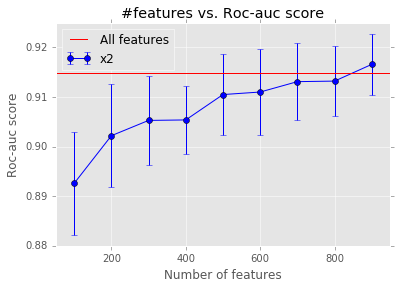

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2,SelectFromModel



# We use a non-linear model namely Random Forest which 
# builds multiple decision trees
model = RandomForestClassifier(n_estimators=50,max_depth=15,n_jobs=3)

# We will try several values for the selected features
k_values = np.arange(100,1000,100)
mean = []
stds = []
for k in k_values:
    X_new = SelectKBest(chi2, k=k).fit_transform(data, labels)
    m,std = crossValidateClassifier(X_new,labels,model)
    mean.append(m)
    stds.append(std)

m,std = crossValidateClassifier(data,labels,model)

plt.errorbar(k_values,mean,yerr=stds,color="blue", fmt='-o',label="x2")
plt.axhline(y=m,color='red',label="All features")
plt.xlabel('Number of features')
plt.ylabel('Roc-auc score')
plt.title('#features vs. Roc-auc score')
plt.legend(loc='best')
plt.xlim(50,950)

We will use now another predictive model in order to select a number of features and then feed them to the learner. Scikit-learn provides a wrapper SelectFromModel for this purpose.

Selected 365 features, C = 0.001000
Selected 615 features, C = 0.010000
Selected 740 features, C = 0.100000
Selected 827 features, C = 1.000000
Selected 845 features, C = 10.000000
Selected 854 features, C = 100.000000
Selected 856 features, C = 1000.000000


(340, 880)

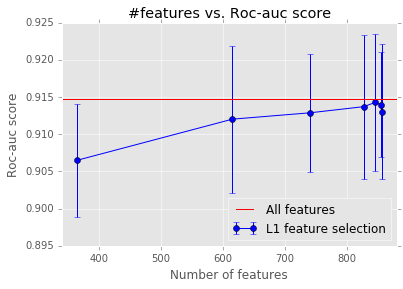

In [24]:
from sklearn.feature_selection import SelectFromModel

# A parameter to be tuned for the feature selector
c_values = [0.001,0.01,0.1,1,10,100,1000]

mean = []
stds = []
shapes = []
for c in c_values:
    # We use a linear model with L1-regularization as feature selector
    selector = SelectFromModel(LinearSVC(C=c, penalty="l1", dual=False),prefit=False)
    X_new = selector.fit_transform(data,labels)
    print ("Selected {0:d} features, C = {1:f}".format(X_new.shape[1],c))
    mn,std = crossValidateClassifier(X_new,labels,model)
    shapes.append(X_new.shape[1])
    mean.append(mn)
    stds.append(std)

plt.errorbar(shapes,mean,yerr=stds,color="blue", fmt='-o',label="L1 feature selection")
plt.axhline(y=m,color='red',label="All features")
plt.xlabel('Number of features')
plt.ylabel('Roc-auc score')
plt.title('#features vs. Roc-auc score')
plt.legend(loc='best')
plt.xlim(340,880)

# 5. Constructing a machine learning pipeline

So, we have seen sofar how to pre-process a dataset, apply features selection methods, tune parameters and train predictive models. Usually, all these steps are packed in a single pipeline in order to replicate easilly the experiments with different settings.

In [25]:
# We first import the method from Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

# We define a sequence of steps
# Let's start with a fetures selection method followed by a random-forest learner

transformers = [('select_k_best',SelectKBest(chi2)),("rf_model",RandomForestClassifier())]
pipeline = Pipeline(transformers)

# set some parameters for grid searching
# to do that we use the following convention: nameoftransformer__nameofparameter=[list of values]

params = dict(select_k_best__k=np.arange(100,400,100), rf_model__n_estimators=[50,100,300], 
              rf_model__max_depth=[10, 20,30])

# Do a grid search with 5-cv. Note that this results to 27*5 fits. So, it may take some time for large datasets
# Let's split the data to speed-up things

X_train,X_test,y_train,y_test = cross_validation.train_test_split(data,labels,test_size=0.7,random_state=51)

tuned_pipeline = GridSearchCV(pipeline, param_grid=params,scoring='roc_auc', n_jobs=3, refit=True, cv=5).fit(X_train, y_train)

# Print the best parameters found
print (tuned_pipeline.best_params_)

# Test these parameters. The pipeline is a convenient way to apply all the steps in new data.
# We simply have to call the predict method as in the case of other estimators.

print  ("Roc-auc score: {0:f}".format(metrics.roc_auc_score(y_test, tuned_pipeline.predict(X_test))))

{'select_k_best__k': 300, 'rf_model__n_estimators': 300, 'rf_model__max_depth': 20}
Roc-auc score: 0.824778


### Exercise

Repeat the same procedure by adding a further step of feature selection which removes the low variance features.